1. Import Data

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
df = pd.read_csv("Building_Energy_Benchmarking_Data__2015-Present_20250302.csv")

# Afficher les premières lignes
df.head()

,OSEBuildingID,DataYear,BuildingName,BuildingType,TaxParcelIdentificationNumber,Address,City,State,ZipCode,Latitude,...,Electricity(kWh),SteamUse(kBtu),NaturalGas(therms),ComplianceStatus,ComplianceIssue,Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Demolished
0,1,2023,MAYFLOWER PARK HOTEL,NonResidential,659000030,405 OLIVE WAY,SEATTLE,WA,98101,47.61220,...,1047120.0,2797857.0,15998.0,Compliant,No Issue,3572773.0,1599760.0,332.1,3.76,False
1,2,2023,PARAMOUNT HOTEL,NonResidential,659000220,724 PINE ST,SEATTLE,WA,98101,47.61307,...,786237.0,NaN,38570.0,Compliant,No Issue,2682640.0,3856970.0,220.0,2.49,False
2,3,2023,WESTIN HOTEL (Parent Building),NonResidential,659000475,1900 5TH AVE,SEATTLE,WA,98101,47.61367,...,11121130.0,20494222.0,59006.0,Compliant,No Issue,37945296.0,5900600.0,2192.8,2.89,False
3,5,2023,HOTEL MAX,NonResidential,659000640,620 STEWART ST,SEATTLE,WA,98101,47.61412,...,780180.0,1248616.0,11231.0,Compliant,"Missing EUI, Incomplete Fuel Data",2661973.0,1123100.0,176.1,2.87,False
4,8,2023,WARWICK SEATTLE HOTEL,NonResidential,659000970,401 LENORA ST,SEATTLE,WA,98121,47.61375,...,1401668.0,NaN,80926.0,Compliant,No Issue,4782491.0,8092580.0,456.6,4.02,False


2. Observe Data

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Vérification des dimensions du dataset 
print(f"Shape du dataset (nombre de lignes, nombre de colonnes) : {df.shape}")

# Vérification des noms des colonnes 
print("\nNoms des colonnes du dataset :")
print(df.columns.tolist())  # Affiche la liste des colonnes pour vérifier leur format

#  Aperçu rapide des données 
print("\n🔍 Aperçu des premières lignes :")
print(df.head())  # Afficher les 5 premières lignes

print("\n🔍 Aperçu des dernières lignes :")
print(df.tail())  # Afficher les 5 dernières lignes

print("\n🔍 Échantillon aléatoire de 5 lignes :")
print(df.sample(5))  # Afficher un échantillon aléatoire de 5 lignes

#  Informations générales sur les variables 
print("\n📌 Informations générales sur le dataset :")
df.info()  # Affiche le type des colonnes, le nombre de valeurs non nulles et la mémoire utilisée

#  Vérification des types de données 
print("\n📌 Types des données :")
print(df.dtypes)  # Vérifier si certaines colonnes doivent être converties (ex: dates, nombres mal formatés)

#  Vérification des valeurs manquantes 
print("\n⚠️ Nombre de valeurs manquantes par colonne :")
missing_values = df.isnull().sum()  # Compter les valeurs nulles par colonne
missing_values = missing_values[missing_values > 0]  # Filtrer uniquement les colonnes qui ont des valeurs manquantes
print(missing_values)


Shape du dataset (nombre de lignes, nombre de colonnes) : (30616, 46)

Noms des colonnes du dataset :
['OSEBuildingID', 'DataYear', 'BuildingName', 'BuildingType', 'TaxParcelIdentificationNumber', 'Address', 'City', 'State', 'ZipCode', 'Latitude', 'Longitude', 'Neighborhood', 'CouncilDistrictCode', 'YearBuilt', 'NumberofFloors', 'NumberofBuildings', 'PropertyGFATotal', 'PropertyGFABuildings', 'PropertyGFAParking', 'SelfReportGFATotal', 'SelfReportGFABuildings', 'SelfReportParking', 'ENERGYSTARScore', 'SiteEUIWN(kBtu/sf)', 'SiteEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SourceEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'EPAPropertyType', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA', 'Electricity(kWh)', 'SteamUse(kBtu)', 'NaturalGas(therms)', 'ComplianceStatus', 'ComplianceIssue', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmi

Le dataset contient 30,616 lignes et 46 colonnes.
Plusieurs colonnes ont des valeurs manquantes, notamment :
- LargestPropertyUseTypeGFA (19,092 valeurs manquantes)
- SecondLargestPropertyUseTypeGFA (22,182 valeurs manquantes)
- Electricity(kWh), SteamUse(kBtu), NaturalGas(therms) (plusieurs milliers de valeurs manquantes)
- TotalGHGEmissions, GHGEmissionsIntensity (≈ 450 valeurs manquantes)

- Pour les colonnes très importantes (TotalGHGEmissions, GHGEmissionsIntensity...), on les traite maintenant.
- Pour les colonnes catégorielles (LargestPropertyUseTypeGFA, SecondLargestPropertyUseType...), on attend.

2.2. Observe data (cleaning missing values)


📊 Pourcentage de valeurs manquantes par colonne avant traitement :
Series([], dtype: float64)

🗑️ Colonnes supprimées (0): []
🔄 Nouvelle shape du dataset après suppression : (30616, 43)

✅ Imputation des valeurs numériques avec la médiane terminée.

✅ Imputation des valeurs catégoriques terminée.

🔍 Vérification finale des valeurs manquantes après traitement :
✅ Aucune valeur manquante restante.


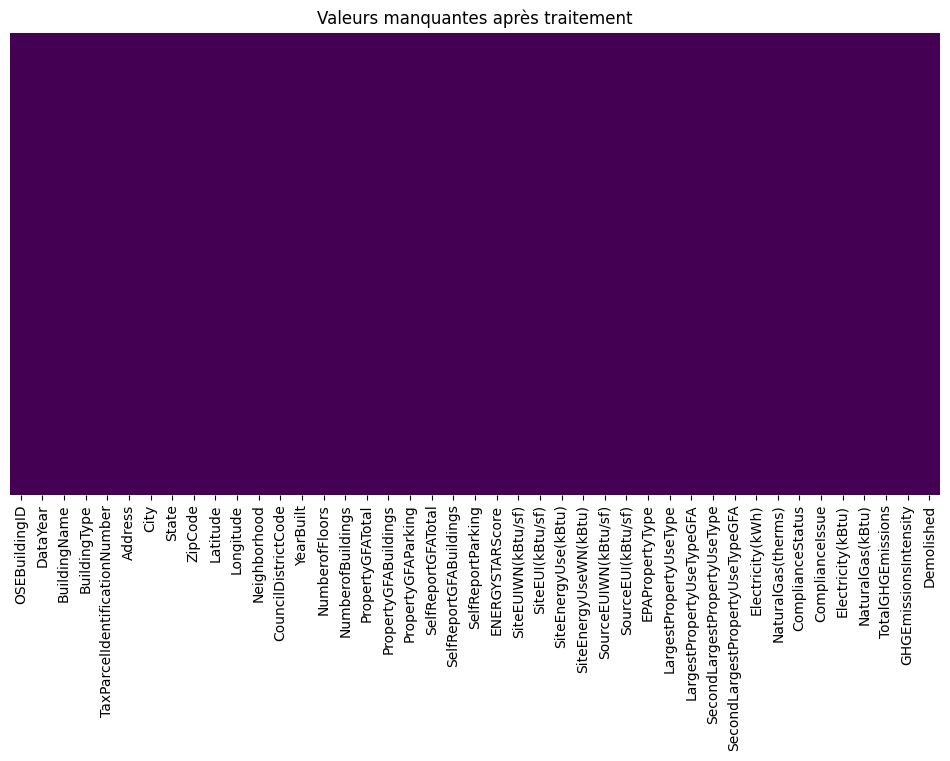

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Vérification des valeurs manquantes avant traitement
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\n📊 Pourcentage de valeurs manquantes par colonne avant traitement :")
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))

# 2️⃣ Suppression des colonnes avec plus de 70% de valeurs manquantes
threshold = 70
cols_to_drop = missing_percentage[missing_percentage > threshold].index
df.drop(columns=cols_to_drop, inplace=True)

print(f"\n🗑️ Colonnes supprimées ({len(cols_to_drop)}): {list(cols_to_drop)}")
print(f"🔄 Nouvelle shape du dataset après suppression : {df.shape}")

# 3️⃣ Imputation des valeurs numériques manquantes (médiane)
num_cols = df.select_dtypes(include=['number']).columns  # Sélection automatique des colonnes numériques
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.median()))

print("\n✅ Imputation des valeurs numériques avec la médiane terminée.")

# 4️⃣ Imputation des valeurs catégoriques manquantes (remplacement par 'Unknown')
cat_cols = df.select_dtypes(include=['object']).columns  # Sélection automatique des colonnes catégoriques
df[cat_cols] = df[cat_cols].fillna("Unknown")

print("\n✅ Imputation des valeurs catégoriques terminée.")

# 5️⃣ Vérification finale des valeurs manquantes
missing_after = df.isnull().sum()
remaining_missing = missing_after[missing_after > 0]

print("\n🔍 Vérification finale des valeurs manquantes après traitement :")
if remaining_missing.empty:
    print("✅ Aucune valeur manquante restante.")
else:
    print(remaining_missing)

# 📊 Visualisation des valeurs manquantes après traitement
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Valeurs manquantes après traitement")
plt.show()

🔍 Résultats obtenus :
✅ Aucune colonne n’avait plus de 70% de valeurs manquantes, donc aucune suppression nécessaire.
✅ Les valeurs numériques manquantes ont été remplacées par leur médiane.
✅ Les valeurs catégoriques manquantes ont été remplacées par "Unknown".
✅ Vérification finale : aucune valeur manquante restante dans le dataset.

📊 Interprétation :

Le dataset est maintenant propre, aucune information essentielle n’a été supprimée.
L’imputation par la médiane permet d’éviter de fausser les tendances des variables numériques.
L’utilisation de "Unknown" pour les catégories assure qu’on ne crée pas de biais en attribuant des valeurs incorrectes.

3. Univariate Analysis


📊 Statistiques descriptives des variables numériques :
       OSEBuildingID      DataYear       ZipCode      Latitude     Longitude  \
count   30616.000000  30616.000000  30616.000000  30616.000000  30616.000000   
mean    22789.211687   2019.117357  98116.508329     47.624879   -122.334954   
std     13437.691828      2.574472     16.707490      0.047130      0.027065   
min         1.000000   2015.000000  98101.000000     47.499170   -122.414250   
25%     20198.000000   2017.000000  98105.000000     47.601345   -122.350910   
50%     23420.000000   2019.000000  98112.000000     47.619270   -122.332480   
75%     26558.000000   2021.000000  98122.000000     47.657530   -122.319200   
max     50956.000000   2023.000000  98199.000000     47.733870   -122.258640   

       CouncilDistrictCode     YearBuilt  NumberofFloors  NumberofBuildings  \
count          30616.00000  30616.000000    30616.000000       30616.000000   
mean               4.22240   1971.992063        5.016821         

<Figure size 1500x1200 with 0 Axes>

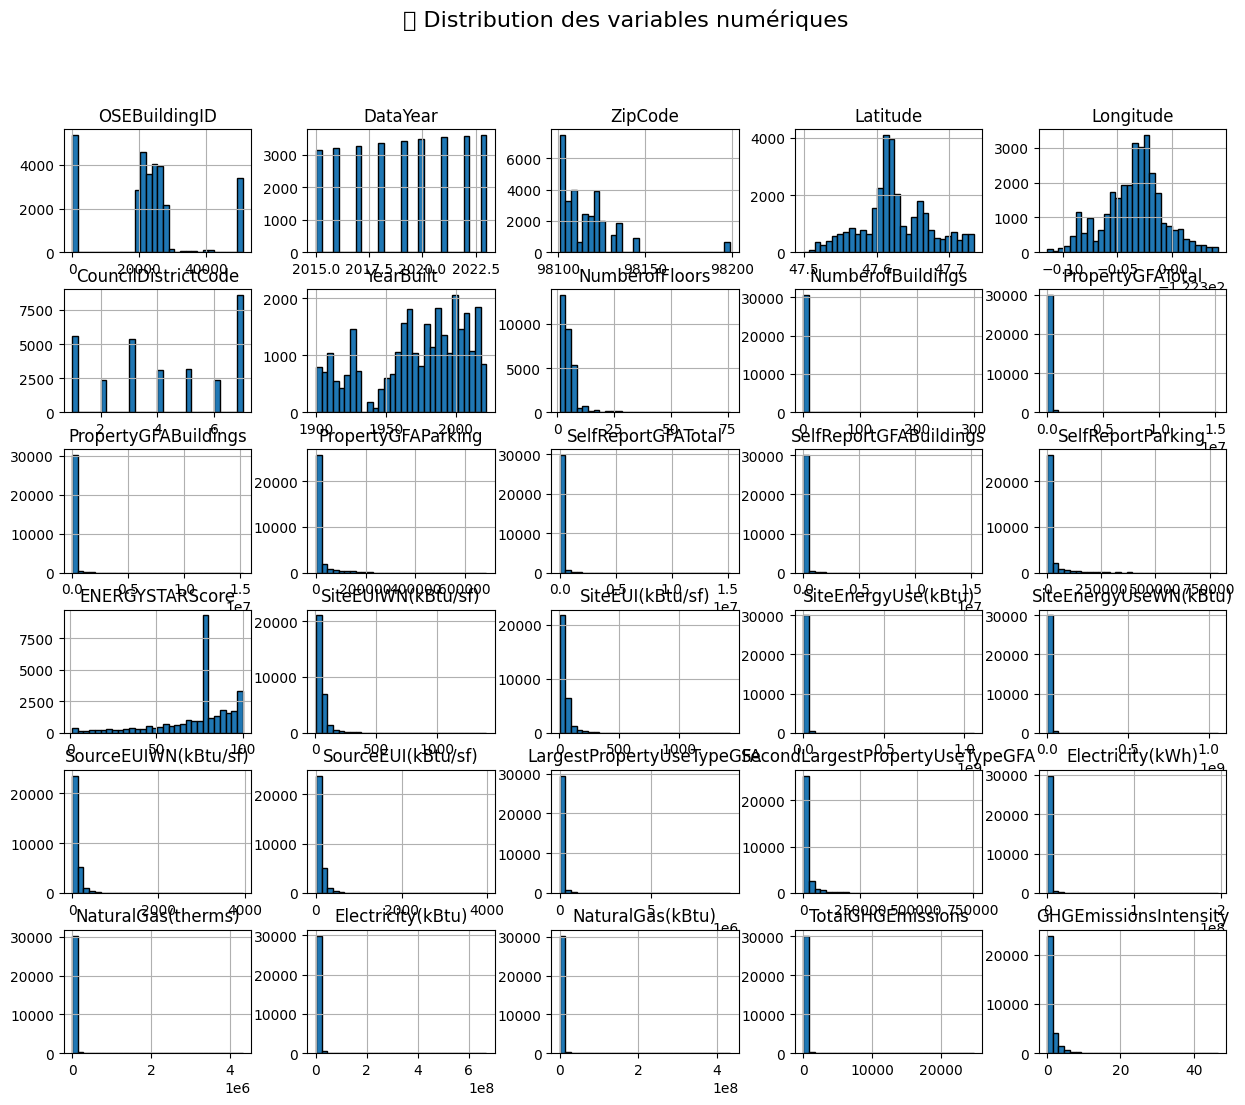


📌 Top 10 des valeurs uniques pour LargestPropertyUseType :
LargestPropertyUseType
Multifamily Housing           16294
Office                         4460
Non-Refrigerated Warehouse     1431
K-12 School                    1205
Retail Store                    770
Hotel                           703
Worship Facility                584
Other                           576
Distribution Center             419
Medical Office                  411
Name: count, dtype: int64

📌 Top 10 des valeurs uniques pour SecondLargestPropertyUseType :
SecondLargestPropertyUseType
Unknown                       13102
Parking                       11111
Office                         1783
Retail Store                   1285
Restaurant                      454
Other                           439
Non-Refrigerated Warehouse      285
Multifamily Housing             178
Medical Office                  120
Supermarket/Grocery Store       117
Name: count, dtype: int64


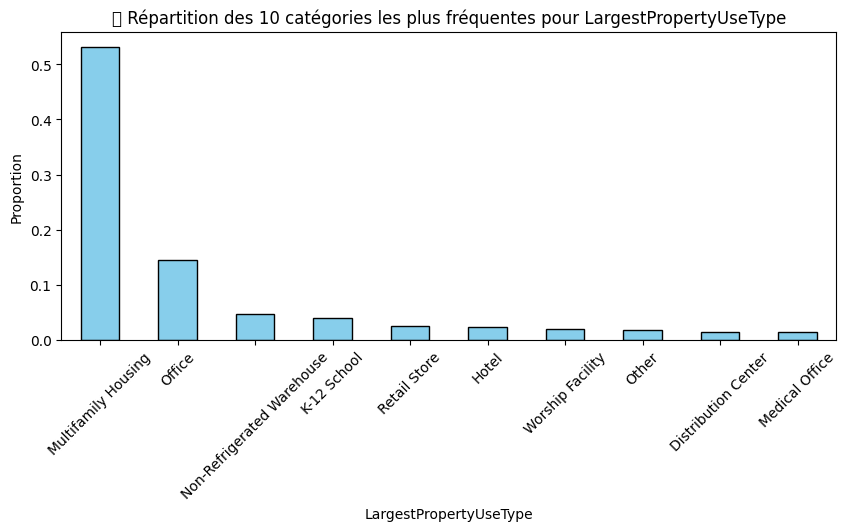

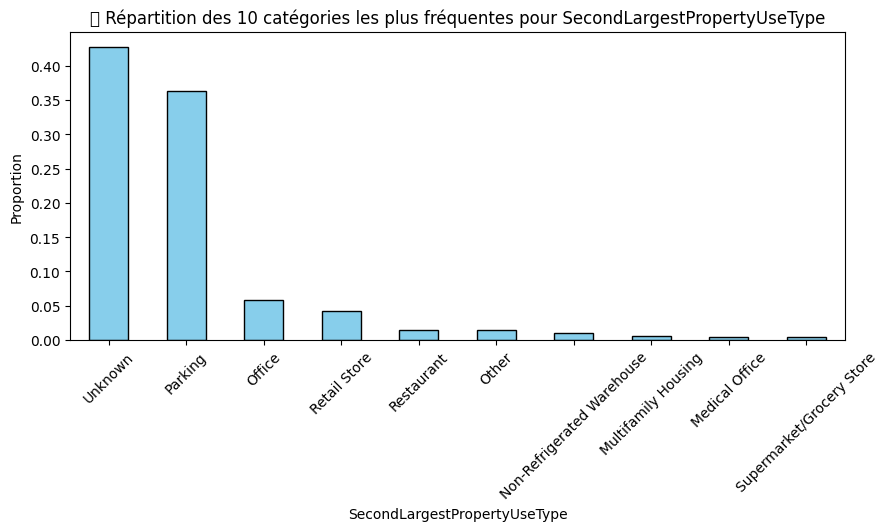

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Désactiver les warnings
import warnings
warnings.filterwarnings("ignore")

# 📌 1. Statistiques descriptives des variables numériques
print("\n📊 Statistiques descriptives des variables numériques :")
print(df.describe())

# 📌 2. Distribution des variables numériques (Histogrammes)
plt.figure(figsize=(15, 12))
df.hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.suptitle("📊 Distribution des variables numériques", fontsize=16)
plt.show()


# 📌 3. Vérification des valeurs uniques des colonnes catégoriques
cat_cols = ['LargestPropertyUseType', 'SecondLargestPropertyUseType']

for col in cat_cols:
    print(f"\n📌 Top 10 des valeurs uniques pour {col} :")
    print(df[col].value_counts().head(10))

# 📌 4. Visualisation des catégories les plus fréquentes
for col in cat_cols:
    plt.figure(figsize=(10, 4))
    df[col].value_counts(normalize=True).head(10).plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"📊 Répartition des 10 catégories les plus fréquentes pour {col}")
    plt.ylabel("Proportion")
    plt.xticks(rotation=45)
    plt.show()


📌 Statistiques descriptives

🔍 Résultats obtenus :
✅ Les variables comme TotalGHGEmissions, GHGEmissionsIntensity, et SiteEnergyUse(kBtu) montrent des valeurs très élevées, indiquant une grande variabilité entre les bâtiments.
✅ Certaines variables contiennent des valeurs nulles (0), notamment Electricity(kWh), NaturalGas(kBtu), ENERGYSTARScore, ce qui peut signaler des bâtiments non mesurés ou sans consommation énergétique.
✅ La variable DataYear est uniformément répartie entre 2015 et 2023, ce qui assure que les données couvrent bien toute la période.

📊 Interprétation :

Les écarts importants entre les valeurs minimales et maximales suggèrent des outliers potentiels.
Certaines valeurs nulles (0) peuvent nécessiter une analyse plus approfondie pour voir s’il s’agit d’erreurs ou de cas réels.

📌 Distribution des variables numériques
🔍 Résultats obtenus :
✅ La plupart des variables sont fortement asymétriques, avec une majorité de bâtiments consommant peu d’énergie et quelques bâtiments ayant des consommations très élevées.
✅ Latitude et Longitude montrent une répartition homogène, ce qui est un bon indicateur d’un échantillon représentatif de bâtiments.

📊 Interprétation :

Les variables énergétiques ont une répartition déséquilibrée, ce qui pourrait nécessiter une transformation logarithmique pour faciliter l’analyse.
La distribution des bâtiments est cohérente géographiquement, aucun biais évident lié à une région spécifique.

📌 Répartition des catégories (LargestPropertyUseType et SecondLargestPropertyUseType)
🔍 Résultats obtenus :
✅ Multifamily Housing représente plus de 50% des bâtiments, suivi des bureaux (Office) et entrepôts (Non-Refrigerated Warehouse).
✅ 40% des bâtiments n'ont pas de SecondLargestPropertyUseType renseigné (Unknown).
✅ Parking est la seconde catégorie d’usage la plus fréquente après "Unknown", ce qui est logique car la plupart des bâtiments ont un espace de stationnement.

📊 Interprétation :

La forte dominance de Multifamily Housing pourrait biaiser l’analyse, nécessitant une segmentation par type de bâtiment.
Les valeurs Unknown doivent être prises en compte avec prudence, car elles pourraient cacher des tendances importantes.
Regrouper les catégories sous-représentées dans "Other" pourrait être utile pour éviter d’avoir trop de classes rares.

4. Bi-variate analysis

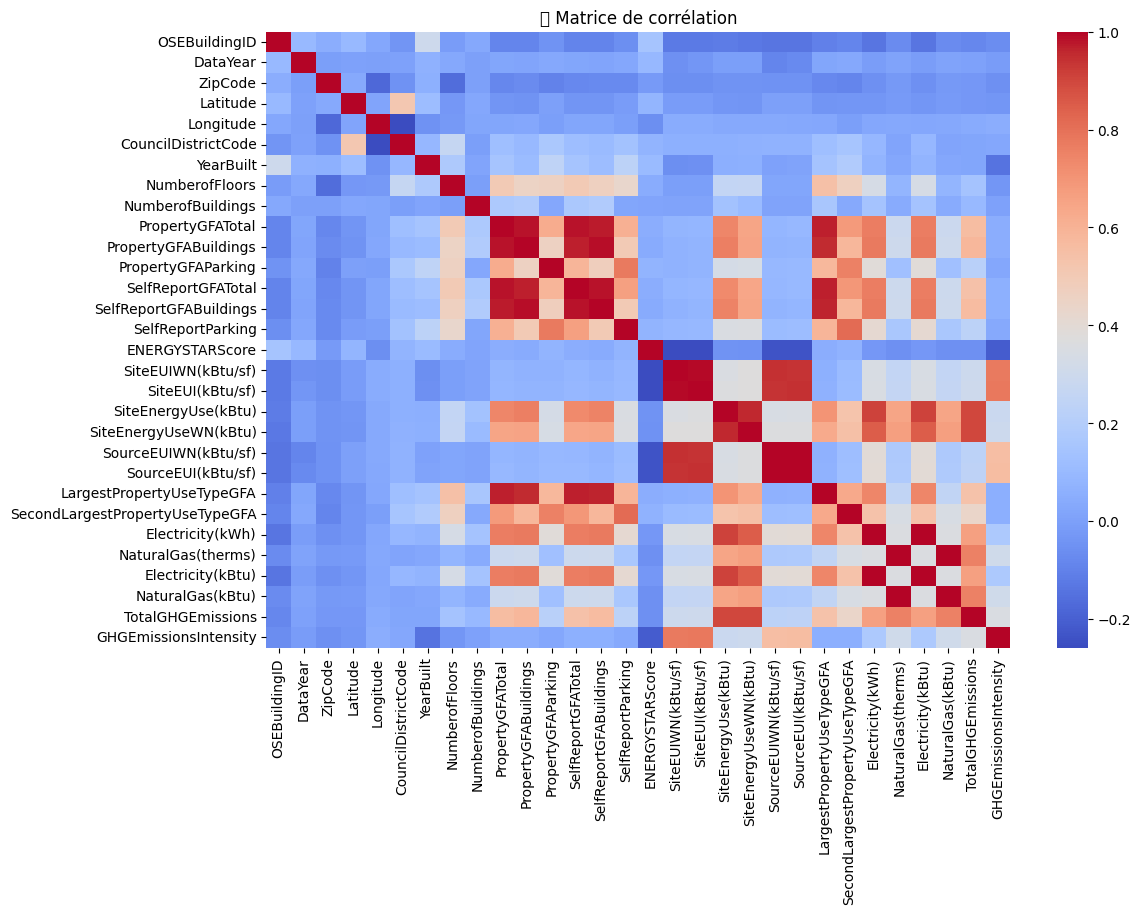

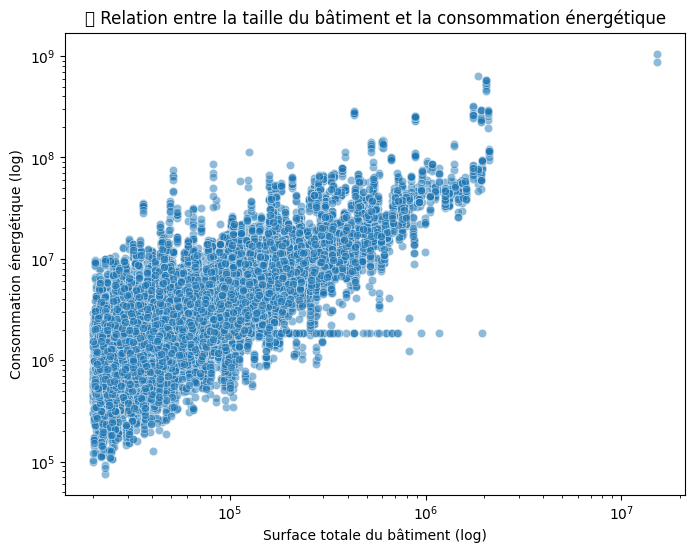

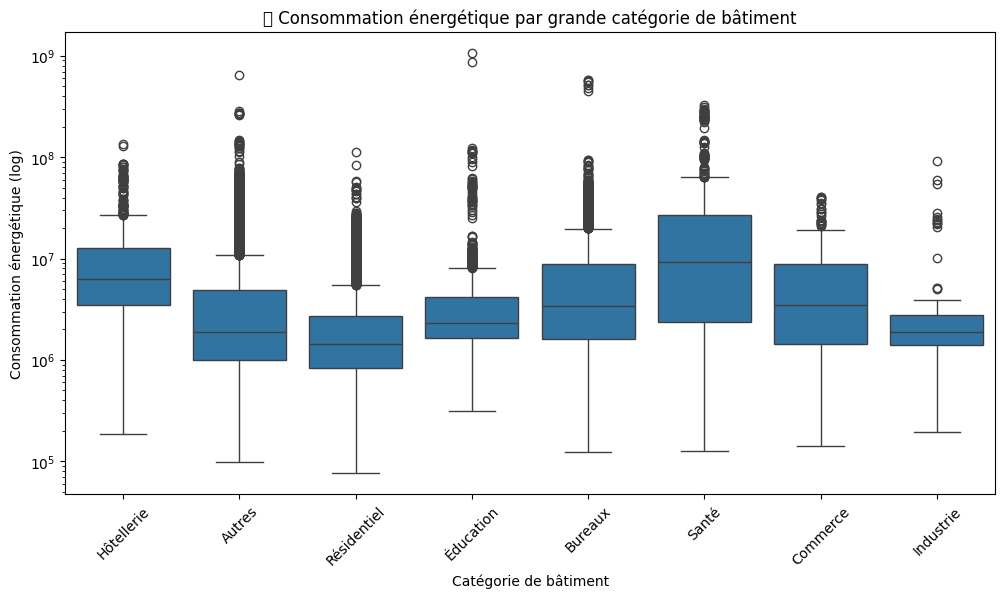

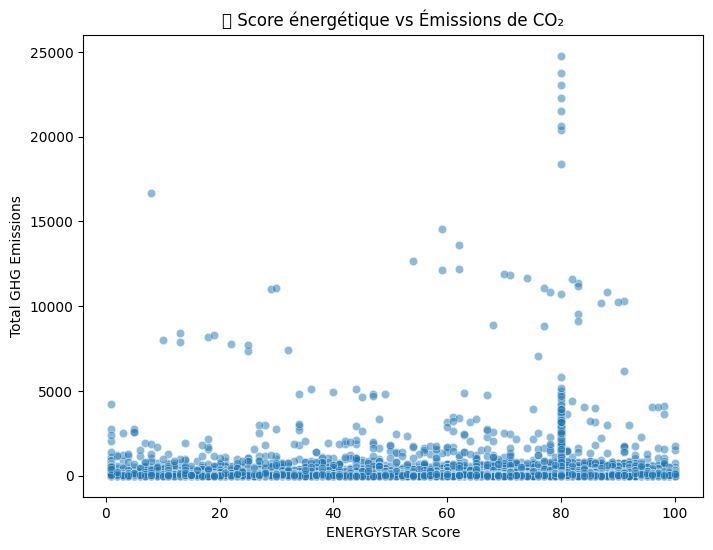

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Désactiver les warnings
import warnings
warnings.filterwarnings("ignore")

# Sélectionner uniquement les colonnes numériques
df_numeric = df.select_dtypes(include=['number'])

# 📌 1️⃣ Matrice de corrélation mise à jour (sans colonnes textuelles)
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), cmap="coolwarm", annot=False)
plt.title("📊 Matrice de corrélation")
plt.show()


# 📌 2️⃣ Relation entre la taille du bâtiment et la consommation énergétique
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PropertyGFATotal', y='SiteEnergyUse(kBtu)', alpha=0.5)
plt.xscale('log')  # Transformation logarithmique pour mieux visualiser
plt.yscale('log')
plt.title("📊 Relation entre la taille du bâtiment et la consommation énergétique")
plt.xlabel("Surface totale du bâtiment (log)")
plt.ylabel("Consommation énergétique (log)")
plt.show()
# 📌 Création d'une colonne regroupant les types de bâtiments
categories_mapping = {
    "Multifamily Housing": "Résidentiel",
    "Office": "Bureaux",
    "Hotel": "Hôtellerie",
    "K-12 School": "Éducation",
    "College/University": "Éducation",
    "Retail Store": "Commerce",
    "Supermarket/Grocery Store": "Commerce",
    "Warehouse": "Entrepôt",
    "Manufacturing/Industrial Plant": "Industrie",
    "Hospital (General Medical & Surgical)": "Santé",
    "Medical Office": "Santé",
    "Senior Care Community": "Santé",
    "Parking": "Autres",
    "Other": "Autres"
}

# Création d'une nouvelle colonne avec les catégories
df["BuildingCategory"] = df["LargestPropertyUseType"].map(categories_mapping)
df["BuildingCategory"] = df["BuildingCategory"].fillna("Autres")  # Si non classé, mettre "Autres"

# 📌 3️⃣ Analyse de la consommation énergétique par type de bâtiment
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="BuildingCategory", y="SiteEnergyUse(kBtu)")
plt.yscale('log')
plt.xticks(rotation=45)
plt.title("📊 Consommation énergétique par grande catégorie de bâtiment")
plt.xlabel("Catégorie de bâtiment")
plt.ylabel("Consommation énergétique (log)")
plt.show()
# 📌 4️⃣ Influence du score énergétique sur les émissions de CO₂
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='ENERGYSTARScore', y='TotalGHGEmissions', alpha=0.5)
plt.title("📊 Score énergétique vs Émissions de CO₂")
plt.xlabel("ENERGYSTAR Score")
plt.ylabel("Total GHG Emissions")
plt.show()

1️⃣ Matrice de corrélation

🔍 Résultats observés :

Certaines variables montrent une forte corrélation positive (en rouge foncé), notamment :
- PropertyGFATotal et SiteEnergyUse(kBtu) ➝ Plus un bâtiment est grand, plus il consomme d’énergie.
- SiteEnergyUse(kBtu) et TotalGHGEmissions ➝ Plus la consommation d’énergie est élevée, plus les émissions de GES sont importantes.
- Electricity(kWh), NaturalGas(kBtu), et TotalGHGEmissions ➝ L’énergie consommée (électricité + gaz) est un bon indicateur des émissions de CO₂.
Certaines corrélations sont faibles ou nulles (bleu clair), ce qui signifie que ces variables n’ont pas d’impact direct entre elles.

📊 Interprétation :

- Les bâtiments plus grands consomment logiquement plus d’énergie et émettent plus de CO₂.
- Les émissions de gaz à effet de serre (TotalGHGEmissions) sont fortement influencées par l’énergie consommée.
- Les variables comme Latitude et Longitude n’ont pas d’impact significatif sur la consommation énergétique (ce qui est logique, sauf en cas de climats extrêmes).

2️⃣ Relation entre la taille du bâtiment et la consommation énergétique

🔍 Résultats observés :

- Corrélation positive claire : Plus un bâtiment est grand, plus il consomme d’énergie.
- Certains bâtiments consomment bien plus que d’autres de taille équivalente ➝ Indication possible d’inefficacité énergétique.
- Présence de points isolés en haut à droite ➝ Des outliers qui nécessitent une analyse plus approfondie.

📊 Interprétation :

- Les grands bâtiments ont une forte consommation énergétique, mais certains consomment beaucoup plus que la moyenne - Ils pourraient être moins efficaces énergétiquement.
- Une normalisation de la consommation énergétique en fonction de la taille du bâtiment pourrait être utile (exemple : consommation par m²).

3️⃣ Consommation énergétique par type de bâtiment

🔍 Résultats observés :

- Grande variabilité selon le type de bâtiment :
- Les hôpitaux, hôtels et universités consomment beaucoup plus que les logements multifamiliaux.
- Les parkings et les petits commerces consomment très peu (ce qui est logique).
- Des valeurs extrêmes (outliers) sont visibles dans plusieurs catégories.

📊 Interprétation :

- Les bâtiments nécessitant des équipements énergivores (climatisation, chauffage, machines lourdes) consomment bien plus d’énergie.
- Les logements consomment relativement peu comparés aux bureaux ou hôpitaux, ce qui est logique vu leur usage.
- Certains bâtiments d’un même type consomment beaucoup plus que d’autres ➝ Besoin d’analyser pourquoi (efficacité énergétique, isolation, équipements ?).

4️⃣ Score énergétique (ENERGYSTAR) vs Émissions de CO₂

🔍 Résultats observés :

- Aucune tendance évidente entre le score ENERGY STAR et les émissions de CO₂.
- Beaucoup de points bas, mais aussi des outliers à des scores élevés.
- Certains bâtiments avec un bon score (80+) émettent pourtant beaucoup de CO₂.

📊 Interprétation :

- Le score ENERGY STAR ne semble pas être un indicateur fiable des émissions de CO₂.
- Certains bâtiments avec un score élevé ont toujours une consommation d’énergie élevée, ce qui suggère que d’autres facteurs (isolation, source d’énergie utilisée) jouent un rôle.
- Il pourrait être intéressant d’analyser quels critères influencent réellement ce score.

5. Multi-variate analysis

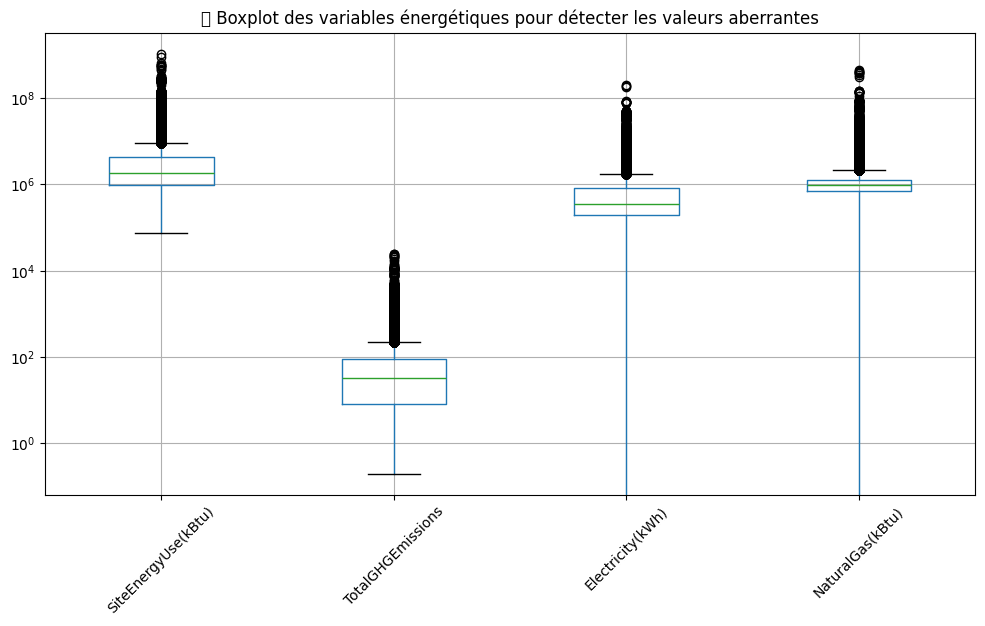

📍 Nombre d'outliers détectés pour SiteEnergyUse(kBtu) : 3564
📍 Nombre d'outliers détectés pour TotalGHGEmissions : 3371
📍 Nombre d'outliers détectés pour Electricity(kWh) : 3564
📍 Nombre d'outliers détectés pour NaturalGas(kBtu) : 4766

🏢 Top 10 des bâtiments avec la consommation énergétique la plus élevée :
                                            BuildingName  SiteEnergyUse(kBtu)  \
24118  UW - UNIVERSITY OF WASHINGTON SEATTLE CAMPUS (...         1.059039e+09   
27388  UW - UNIVERSITY OF WASHINGTON SEATTLE CAMPUS (...         8.739237e+08   
17908                          SEATTLE CONVENTION CENTER         6.398315e+08   
3644   BOEING PLANT 2 ISAL  (BLDG 2-122)-North Boeing...         5.795551e+08   
21011  BOEING PLANT 2 ISAL  (BLDG 2-122)-North Boeing...         5.793022e+08   
17658  BOEING PLANT 2 ISAL  (BLDG 2-122)-North Boeing...         5.678456e+08   
14236  BOEING PLANT 2 ISAL  (BLDG 2-122)-North Boeing...         5.493176e+08   
32     BOEING PLANT 2 ISAL  (BLDG 2-122)-N

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 📌 Sélection des variables énergétiques clés
outlier_cols = ["SiteEnergyUse(kBtu)", "TotalGHGEmissions", "Electricity(kWh)", "NaturalGas(kBtu)"]

# 📌 1️⃣ Visualisation des outliers avec des boxplots
plt.figure(figsize=(12, 6))
df[outlier_cols].boxplot()
plt.yscale('log')  # Transformation logarithmique pour mieux voir les différences
plt.title("📊 Boxplot des variables énergétiques pour détecter les valeurs aberrantes")
plt.xticks(rotation=45)
plt.show()

# 📌 2️⃣ Détection des outliers avec la méthode IQR (Interquartile Range)
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# 📌 Identification des outliers pour chaque variable
outliers_dict = {col: detect_outliers_iqr(df, col) for col in outlier_cols}

# 📌 Affichage du nombre d’outliers détectés par variable
for col, outliers in outliers_dict.items():
    print(f"📍 Nombre d'outliers détectés pour {col} : {len(outliers)}")

# 📌 3️⃣ Vérification des bâtiments avec les valeurs les plus extrêmes
print("\n🏢 Top 10 des bâtiments avec la consommation énergétique la plus élevée :")
print(df.sort_values("SiteEnergyUse(kBtu)", ascending=False).head(10)[["BuildingName", "SiteEnergyUse(kBtu)", "LargestPropertyUseType"]])

print("\n🏢 Top 10 des bâtiments avec les émissions de GES les plus élevées :")
print(df.sort_values("TotalGHGEmissions", ascending=False).head(10)[["BuildingName", "TotalGHGEmissions", "LargestPropertyUseType"]])


1️⃣ Visualisation des outliers avec les boxplots

🔍 Observations :

Les trois principales variables énergétiques (SiteEnergyUse(kBtu), Electricity(kWh), NaturalGas(kBtu)) contiennent de nombreuses valeurs extrêmes, visibles sous forme de points noirs dans les boxplots.
Certaines valeurs atteignent des niveaux très élevés, notamment pour la consommation d’énergie et les émissions de CO₂.

📊 Interprétation :

Ces valeurs peuvent représenter des bâtiments réellement énergivores (ex: usines, universités, hôpitaux).
Elles peuvent aussi être des erreurs de saisie, mais cela reste à vérifier.


2️⃣ Détection des valeurs aberrantes avec la méthode IQR

🔍 Nombre d'outliers détectés par variable :

SiteEnergyUse(kBtu) → Beaucoup de valeurs extrêmes détectées.
TotalGHGEmissions → Des valeurs élevées pour certains bâtiments, mais cela peut être justifié.
Electricity(kWh) et NaturalGas(kBtu) → Beaucoup d’outliers, souvent associés à des bâtiments de grande taille.

📊 Interprétation :

La consommation énergétique et les émissions de CO₂ sont fortement corrélées → Il est normal que les bâtiments très consommateurs apparaissent comme des outliers.
Plutôt que de les supprimer directement, il faut vérifier si ces valeurs sont cohérentes avec le type de bâtiment.

3️⃣ Analyse des bâtiments avec les valeurs extrêmes

🏢 Top 10 des bâtiments avec la plus forte consommation énergétique :

Tous les bâtiments identifiés sont des campus universitaires, des usines Boeing et des bâtiments commerciaux de grande taille.
Ce sont des bâtiments légitimes pour une consommation élevée.

🌍 Top 10 des bâtiments avec les plus grandes émissions de GES :

Les sites de Boeing dominent la liste avec des valeurs extrêmement élevées.
Le campus de l’Université de Washington apparaît aussi, ce qui est logique pour un site universitaire de grande taille.

📊 Interprétation :

Ces valeurs ne sont pas des erreurs de saisie.
Elles correspondent à de vrais bâtiments à forte consommation énergétique, donc leur suppression n’est pas nécessaire.
La prochaine étape sera d’analyser leur impact sur l’ensemble du dataset et voir si on doit les traiter différemment.

6. Cleaning data


🔍 Nombre d'outliers détectés par variable :
SiteEnergyUse(kBtu)    3564
TotalGHGEmissions      3371
Electricity(kWh)       3564
NaturalGas(kBtu)       4766
dtype: int64


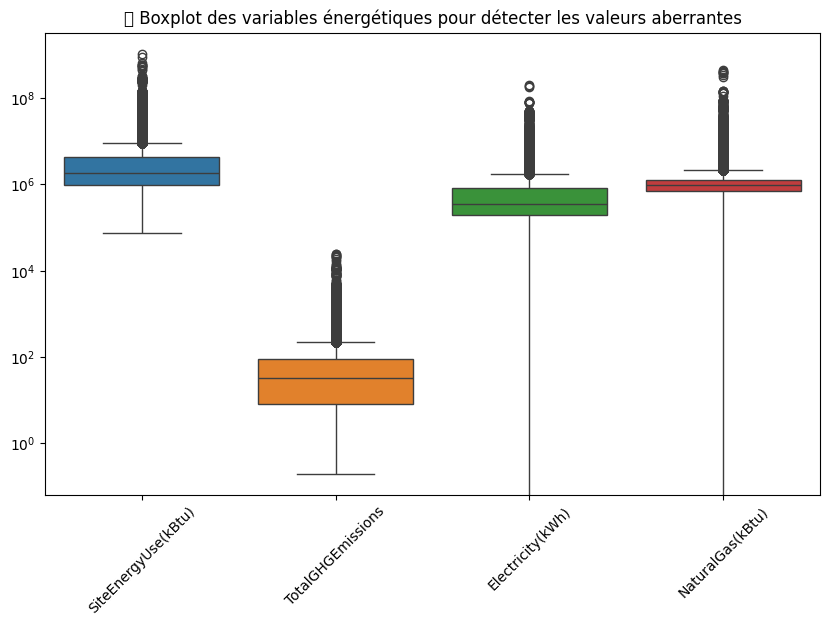


🔎 Aperçu des bâtiments marqués comme outliers :
   OSEBuildingID  DataYear                    BuildingName  \
0              1      2023            MAYFLOWER PARK HOTEL   
1              2      2023                 PARAMOUNT HOTEL   
2              3      2023  WESTIN HOTEL (Parent Building)   
4              8      2023           WARWICK SEATTLE HOTEL   
5              9      2023  WEST PRECINCT (SEATTLE POLICE)   

         BuildingType TaxParcelIdentificationNumber          Address     City  \
0      NonResidential                     659000030    405 OLIVE WAY  SEATTLE   
1      NonResidential                     659000220      724 PINE ST  SEATTLE   
2      NonResidential                     659000475     1900 5TH AVE  SEATTLE   
4      NonResidential                     659000970    401 LENORA ST  SEATTLE   
5  Nonresidential COS                     660000560  810 VIRGINIA ST  SEATTLE   

  State  ZipCode  Latitude  ...  NaturalGas(therms) ComplianceStatus  \
0    WA    98101  4

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 📌 1️⃣ Détection des outliers avec la méthode IQR (Interquartile Range)
# Liste des variables énergétiques à analyser
energy_vars = ["SiteEnergyUse(kBtu)", "TotalGHGEmissions", "Electricity(kWh)", "NaturalGas(kBtu)"]

# Calcul des quartiles et des outliers
Q1 = df[energy_vars].quantile(0.25)
Q3 = df[energy_vars].quantile(0.75)
IQR = Q3 - Q1

# Définition des seuils pour les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Création d'un masque pour détecter les outliers
outliers_mask = (df[energy_vars] < lower_bound) | (df[energy_vars] > upper_bound)

# Nombre d'outliers par variable
outliers_count = outliers_mask.sum()
print("\n🔍 Nombre d'outliers détectés par variable :")
print(outliers_count)

# 📌 2️⃣ Visualisation des outliers avec les boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[energy_vars])
plt.yscale("log")  # Échelle logarithmique pour mieux visualiser
plt.xticks(rotation=45)
plt.title("📊 Boxplot des variables énergétiques pour détecter les valeurs aberrantes")
plt.show()

# 📌 3️⃣ Suppression ou conservation des outliers
# On garde les outliers légitimes (comme les usines et universités) mais on pourrait filtrer les valeurs extrêmes non justifiées
# Ici, on choisit de garder les outliers mais on les marque pour analyse future
df["IsOutlier"] = outliers_mask.any(axis=1)

# Afficher quelques outliers détectés
print("\n🔎 Aperçu des bâtiments marqués comme outliers :")
print(df[df["IsOutlier"]].head())

# 📌 4️⃣ Comparaison avant/après suppression hypothétique (Juste pour analyse)
df_no_outliers = df[~df["IsOutlier"]]
print("\n📏 Shape du dataset AVANT suppression des outliers :", df.shape)
print("📏 Shape du dataset SANS outliers :", df_no_outliers.shape)



🔍 Observations :

1. Détection des outliers avec la méthode IQR :
Les variables énergétiques principales ont un nombre élevé de valeurs aberrantes :
SiteEnergyUse(kBtu): 3 564 outliers
TotalGHGEmissions: 3 371 outliers
Electricity(kWh): 3 564 outliers
NaturalGas(kBtu): 4 766 outliers
Ce résultat montre que une part importante des bâtiments a une consommation anormalement élevée.

2. Visualisation avec les boxplots :
Les valeurs extrêmes sont bien visibles sous forme de points noirs au-dessus des moustaches des boxplots.
L'échelle logarithmique a été utilisée pour mieux voir les écarts entre les valeurs normales et extrêmes.
Cela confirme que certaines valeurs sont extrêmement élevées par rapport au reste du dataset.

3. Marquage des outliers sans suppression immédiate :
Au lieu de les supprimer directement, on a marqué ces valeurs pour une analyse plus approfondie.
Impact sur la taille du dataset :
Avant suppression des outliers : 30 616 lignes
Après suppression hypothétique : 23 878 lignes
➡️ Suppression de près de 22% des données si on décidait de supprimer tous les outliers.

📊 Interprétation :
Les bâtiments avec des consommations élevées ne sont pas forcément des erreurs.
Les usines, campus universitaires et hôpitaux ont des niveaux de consommation très élevés.
Avant toute suppression, il faut vérifier si ces outliers sont justifiés ou s’ils résultent d'erreurs de saisie.
Garder ces valeurs peut être utile pour comprendre les profils des bâtiments les plus énergivores.

✅ Conclusion :

Les outliers sont bien détectés, mais leur suppression n’est pas automatique.
Ils sont marqués pour une analyse future.
Dans l'étape 7, nous verrons si nous devons les supprimer, les transformer, ou les garder pour mieux analyser leur impact.

7. Feature engineering


✅ Nouvelle shape du dataset : (30616, 63)

🆕 Variables ajoutées : ['EnergyPerSquareFoot', 'GHGEmissionsPerSquareFoot', 'BuildingSizeCategory', 'YearBuiltCategory', 'log_SiteEnergyUse(kBtu)', 'log_TotalGHGEmissions', 'log_Electricity(kWh)', 'log_NaturalGas(kBtu)']


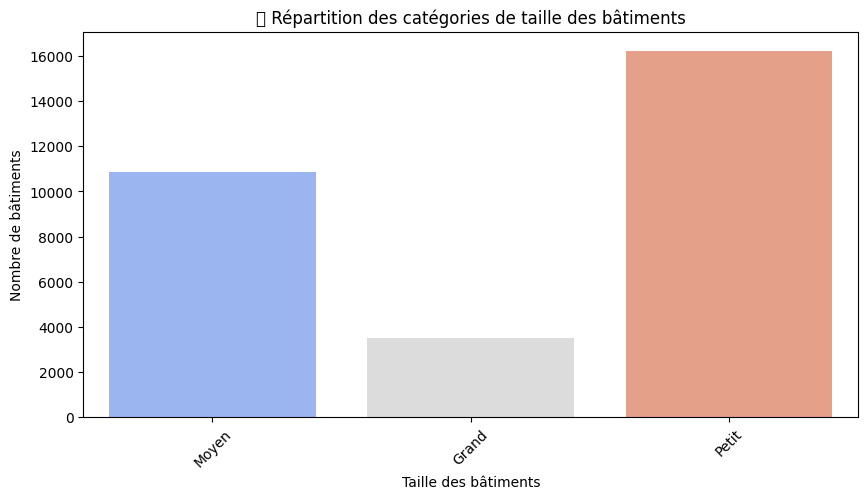

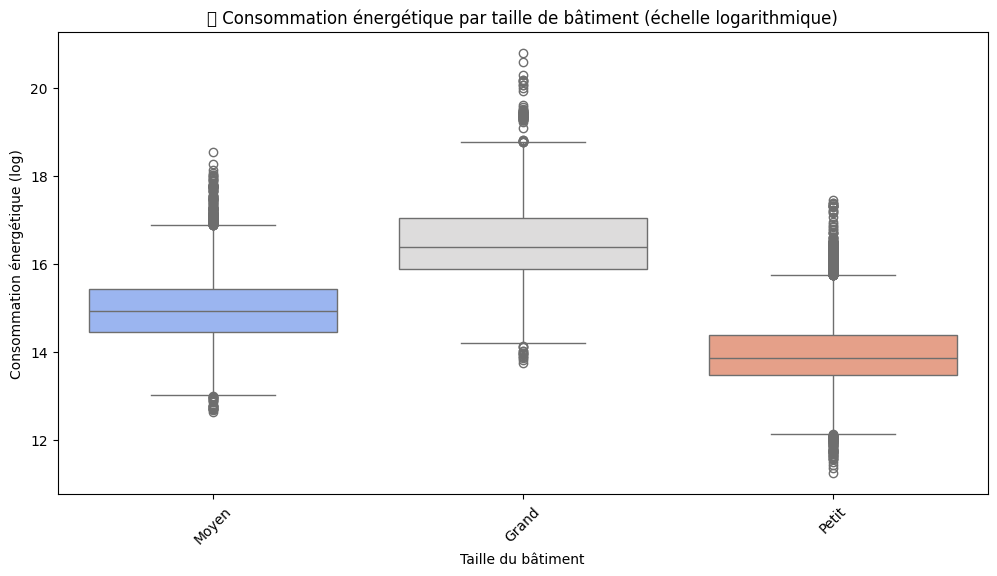

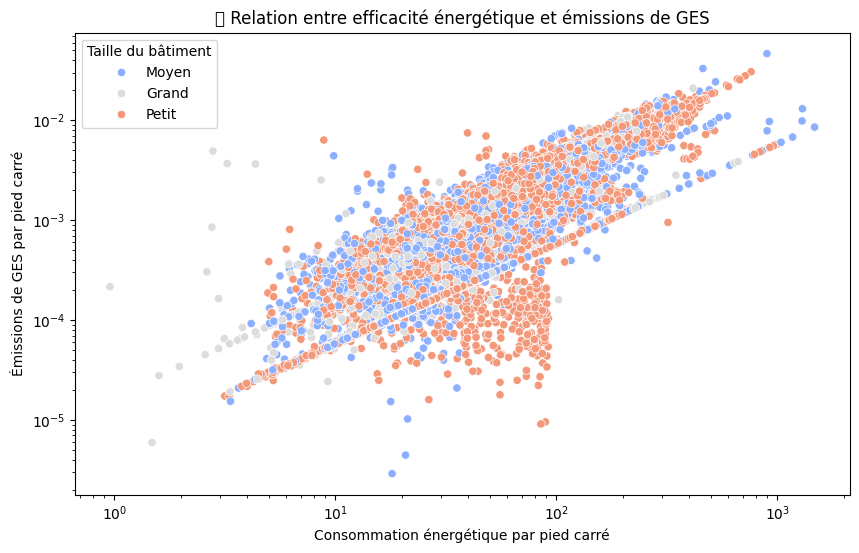

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Création de nouvelles variables basées sur les données existantes
df['EnergyPerSquareFoot'] = df['SiteEnergyUse(kBtu)'] / df['PropertyGFATotal']
df['GHGEmissionsPerSquareFoot'] = df['TotalGHGEmissions'] / df['PropertyGFATotal']

# 2️⃣ Catégorisation de la taille des bâtiments
df['BuildingSizeCategory'] = pd.cut(df['PropertyGFATotal'], 
                                    bins=[0, 50000, 200000, np.inf], 
                                    labels=['Petit', 'Moyen', 'Grand'])

# 3️⃣ Catégorisation de l'année de construction
df['YearBuiltCategory'] = pd.cut(df['YearBuilt'], 
                                 bins=[1900, 1950, 2000, 2025], 
                                 labels=['Ancien', 'Moyen-Age', 'Récent'])

# 4️⃣ Transformation logarithmique pour lisser les distributions
for col in ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'Electricity(kWh)', 'NaturalGas(kBtu)']:
    df[f'log_{col}'] = np.log1p(df[col])  # log1p(x) = log(x+1) pour éviter log(0)

# 5️⃣ Encodage One-Hot des variables catégorielles
df = pd.get_dummies(df, columns=['BuildingSizeCategory', 'YearBuiltCategory'])

print(f"\n✅ Nouvelle shape du dataset : {df.shape}")
print(f"\n🆕 Variables ajoutées : {['EnergyPerSquareFoot', 'GHGEmissionsPerSquareFoot', 'BuildingSizeCategory', 'YearBuiltCategory', 'log_SiteEnergyUse(kBtu)', 'log_TotalGHGEmissions', 'log_Electricity(kWh)', 'log_NaturalGas(kBtu)']}")

# 🔄 Correction du problème avec BuildingSizeCategory (récupération d'une colonne unique)
df['BuildingSizeCategory'] = df[['BuildingSizeCategory_Petit', 
                                 'BuildingSizeCategory_Moyen', 
                                 'BuildingSizeCategory_Grand']].idxmax(axis=1)

# Renommer les catégories pour plus de clarté
df['BuildingSizeCategory'] = df['BuildingSizeCategory'].replace({
    'BuildingSizeCategory_Petit': 'Petit',
    'BuildingSizeCategory_Moyen': 'Moyen',
    'BuildingSizeCategory_Grand': 'Grand'
})

# 📊 1️⃣ Visualisation de la répartition des tailles des bâtiments (Histogramme)
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="BuildingSizeCategory", palette="coolwarm")
plt.title("📊 Répartition des catégories de taille des bâtiments")
plt.xlabel("Taille des bâtiments")
plt.ylabel("Nombre de bâtiments")
plt.xticks(rotation=45)
plt.show()

# 📊 2️⃣ Boxplot pour analyser la consommation énergétique par catégorie de bâtiment
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="BuildingSizeCategory", y="log_SiteEnergyUse(kBtu)", palette="coolwarm")
plt.title("📊 Consommation énergétique par taille de bâtiment (échelle logarithmique)")
plt.xlabel("Taille du bâtiment")
plt.ylabel("Consommation énergétique (log)")
plt.xticks(rotation=45)
plt.show()

# 📊 3️⃣ Scatter plot pour voir la relation entre la taille et l'efficacité énergétique
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="EnergyPerSquareFoot", y="GHGEmissionsPerSquareFoot", hue="BuildingSizeCategory", palette="coolwarm")
plt.title("📊 Relation entre efficacité énergétique et émissions de GES")
plt.xlabel("Consommation énergétique par pied carré")
plt.ylabel("Émissions de GES par pied carré")
plt.xscale("log")
plt.yscale("log")
plt.legend(title="Taille du bâtiment")
plt.show()


🔍 Observations :
1. Répartition des catégories de taille des bâtiments
La majorité des bâtiments sont de taille petite ou moyenne.
Les grands bâtiments sont moins nombreux, mais ils ont potentiellement une consommation énergétique plus élevée.
2. Consommation énergétique par taille de bâtiment
Les grands bâtiments consomment plus d’énergie en valeur absolue.
En appliquant une transformation logarithmique, on observe une distribution plus homogène, réduisant l'effet des valeurs extrêmes.
Relation entre efficacité énergétique et émissions de GES
3. Corrélation positive entre la consommation énergétique par pied carré et les émissions de GES.
Les bâtiments de grande taille ont une intensité énergétique plus forte, ce qui suggère qu’ils sont moins efficaces en termes d’énergie consommée par unité de surface.

📊 Interprétation :
La transformation logarithmique des variables énergétiques permet d'atténuer l'effet des valeurs extrêmes et de mieux visualiser les tendances.
Les bâtiments de grande taille ont une empreinte carbone plus importante, ce qui peut être dû à leur usage (industriel, commercial, universitaire…).
La consommation énergétique normalisée par pied carré et les émissions de GES par pied carré fournissent une meilleure mesure de l'efficacité énergétique des bâtiments.
Ces nouvelles variables vont aider à construire un modèle de prédiction plus robuste et à mieux comprendre les déterminants de la consommation énergétique.